<a href="https://colab.research.google.com/github/TABEYWICKRAMA/Python_series_end-to-end/blob/main/Lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')   #import dataset to drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Test/   #set the path to dataset

[Errno 2] No such file or directory: '/content/drive/MyDrive/Test/ #set the path to dataset'
/content/drive/MyDrive/Test


In [ ]:
train_path = 'Training_data'      #define the training dataset and testing dataset
valid_path = 'Testing_data' 

In [ ]:
import tensorflow as tf          #import tensorflow

model = tf.keras.models.Sequential([
    
    #This is the first convolution
    tf.keras.layers.Conv2D(filters=2,kernel_size=3, activation='sigmoid',input_shape=(124,124,3)),
    tf.keras.layers.MaxPooling2D(2,1),

    #The second convolution
    tf.keras.layers.Conv2D(filters=2,kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    #flatten the dataset
    tf.keras.layers.Flatten(),       

    # Fully connected layer with 50 neurons
    tf.keras.layers.Dense(50, activation= 'relu'),

    # Output layer with, softmax as activation function
    tf.keras.layers.Dense(5, activation='softmax')

])



In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 122, 122, 2)       56        
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 121, 121, 2)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 119, 119, 2)       38        
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 59, 59, 2)        0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 6962)              0         
                                                                 
 dense_8 (Dense)             (None, 50)               

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss ='categorical_crossentropy',
              optimizer=RMSprop(lr=0.00001),      #decreasing learning rate to learn more(modify)
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#All train image will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale = 1./255)

#Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_path, # this is the source directory
                                                    target_size = (124,124), 
                                                    batch_size = 16, 
                                                    class_mode='categorical')

# All test images will rescaled by 1./255
test_datagen = ImageDataGenerator(rescale=1./255)
# apply predefined specification to test dataset
test_set = test_datagen.flow_from_directory(valid_path, target_size = (124,124), batch_size=16, class_mode='categorical')

Found 528 images belonging to 5 classes.
Found 123 images belonging to 5 classes.


In [ ]:
history = model.fit(
    train_generator,
    validation_data=test_set,
    steps_per_epoch=8,
    epochs=100          #increase the epochs to 100(modify)
)

Epoch 1/100
8/8 [==============================] - 3s 307ms/step - loss: 1.6002 - accuracy: 0.2734 - val_loss: 1.6014 - val_accuracy: 0.2602
Epoch 2/100
8/8 [==============================] - 2s 282ms/step - loss: 1.5571 - accuracy: 0.3438 - val_loss: 1.5912 - val_accuracy: 0.2846
Epoch 3/100
8/8 [==============================] - 4s 469ms/step - loss: 1.5704 - accuracy: 0.2422 - val_loss: 1.5908 - val_accuracy: 0.2683
Epoch 4/100
8/8 [==============================] - 2s 285ms/step - loss: 1.5926 - accuracy: 0.2422 - val_loss: 1.5763 - val_accuracy: 0.2764
Epoch 5/100
8/8 [==============================] - 2s 287ms/step - loss: 1.5968 - accuracy: 0.2344 - val_loss: 1.5823 - val_accuracy: 0.2683
Epoch 6/100
8/8 [==============================] - 2s 278ms/step - loss: 1.6012 - accuracy: 0.1875 - val_loss: 1.5821 - val_accuracy: 0.3008
Epoch 7/100
8/8 [==============================] - 2s 279ms/step - loss: 1.5778 - accuracy: 0.2656 - val_loss: 1.5836 - val_accuracy: 0.2439
Epoch 8/100
8

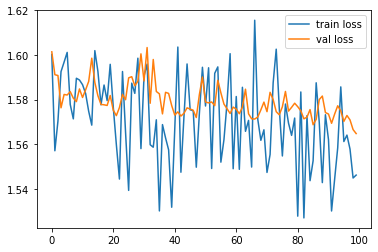

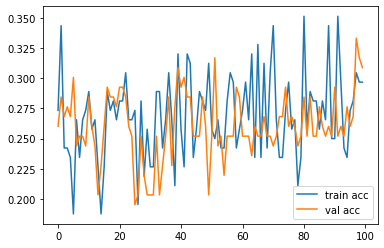

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('q2_IT20131074_loss')

#plot the accuracy\n
plt.plot(history.history['accuracy'],label='train acc')
plt.plot(history.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()
plt.savefig('q2_IT20131074_accuracy')